In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('concrete_data.csv')

# Basic info
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB
None
            cement  blast_furnace_slag      fly_ash        water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    

In [25]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Remove duplicates if any
df = df.drop_duplicates()

# Check for missing values
print(df.isnull().sum())

# Handle missing values if any (this dataset appears complete)
# df = df.dropna()  # if needed

Duplicate rows: 25
cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64


In [26]:
df = df.rename(columns={'fine_aggregate ': 'fine_aggregate'})  # Remove space

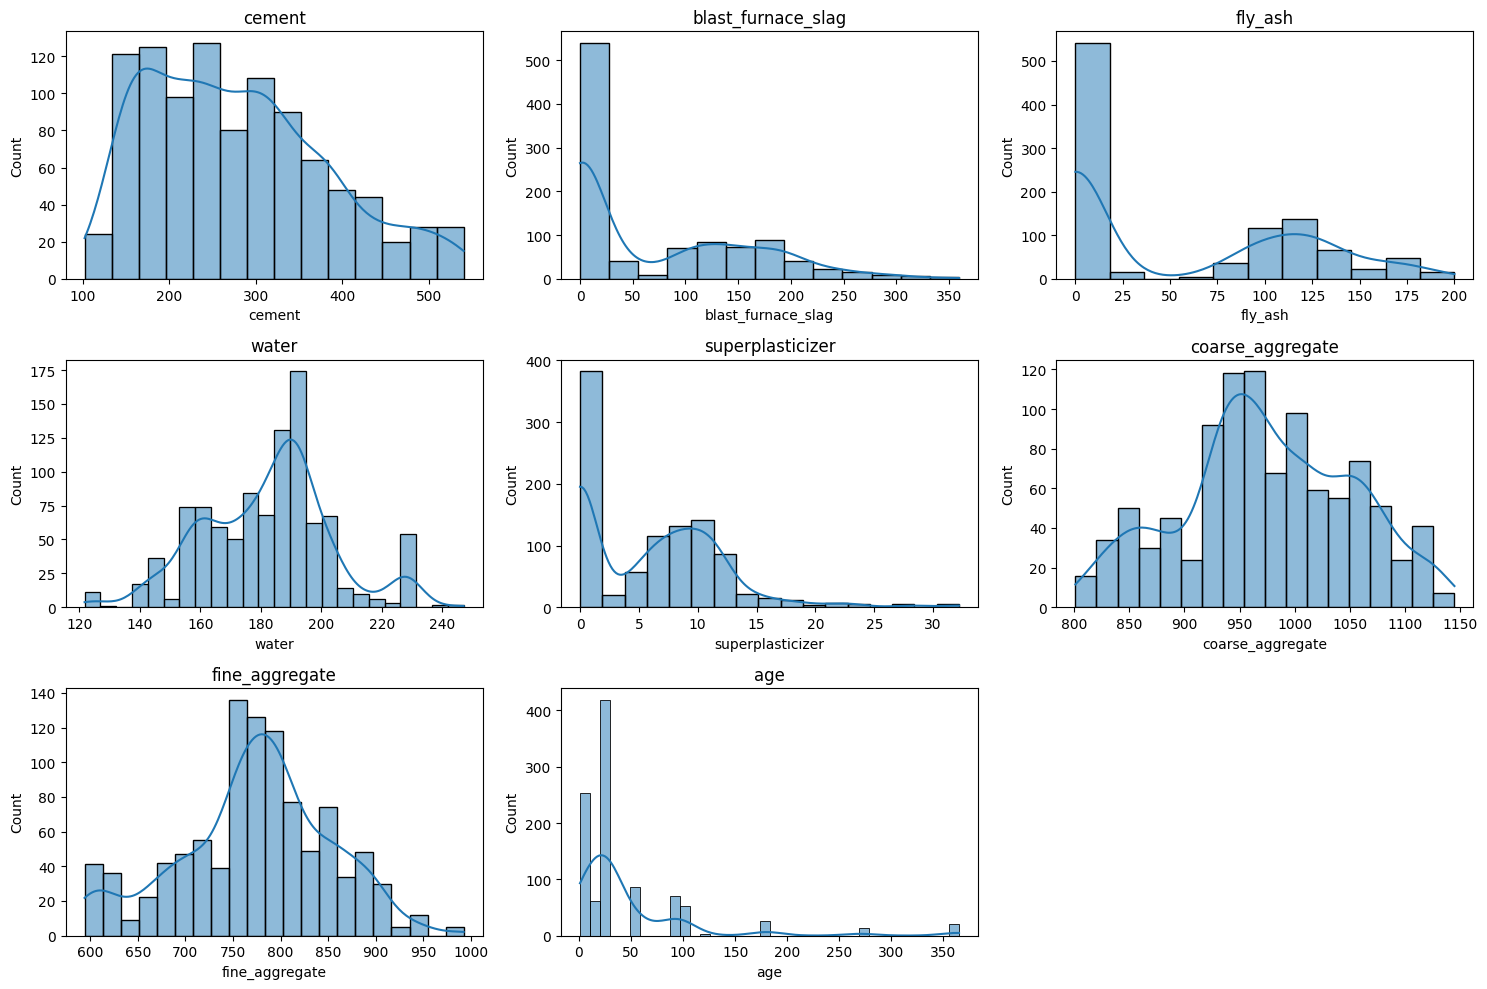

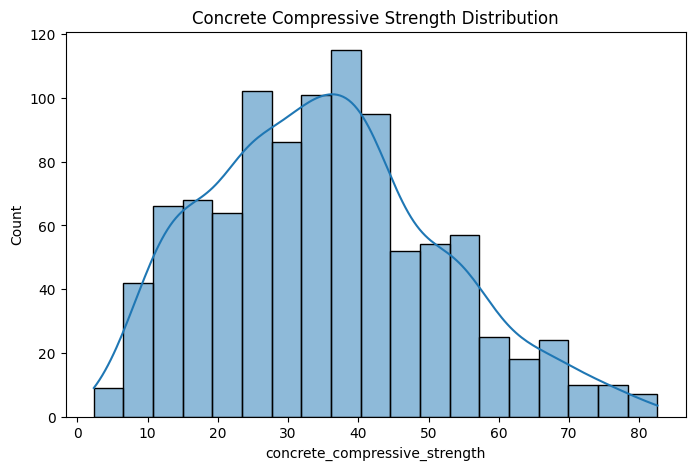

In [27]:
# List of features
features = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 
            'coarse_aggregate', 'fine_aggregate', 'age', 'concrete_compressive_strength']

# Visualize distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(features[:-1]):  # exclude target
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Target variable distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['concrete_compressive_strength'], kde=True)
plt.title('Concrete Compressive Strength Distribution')
plt.show()

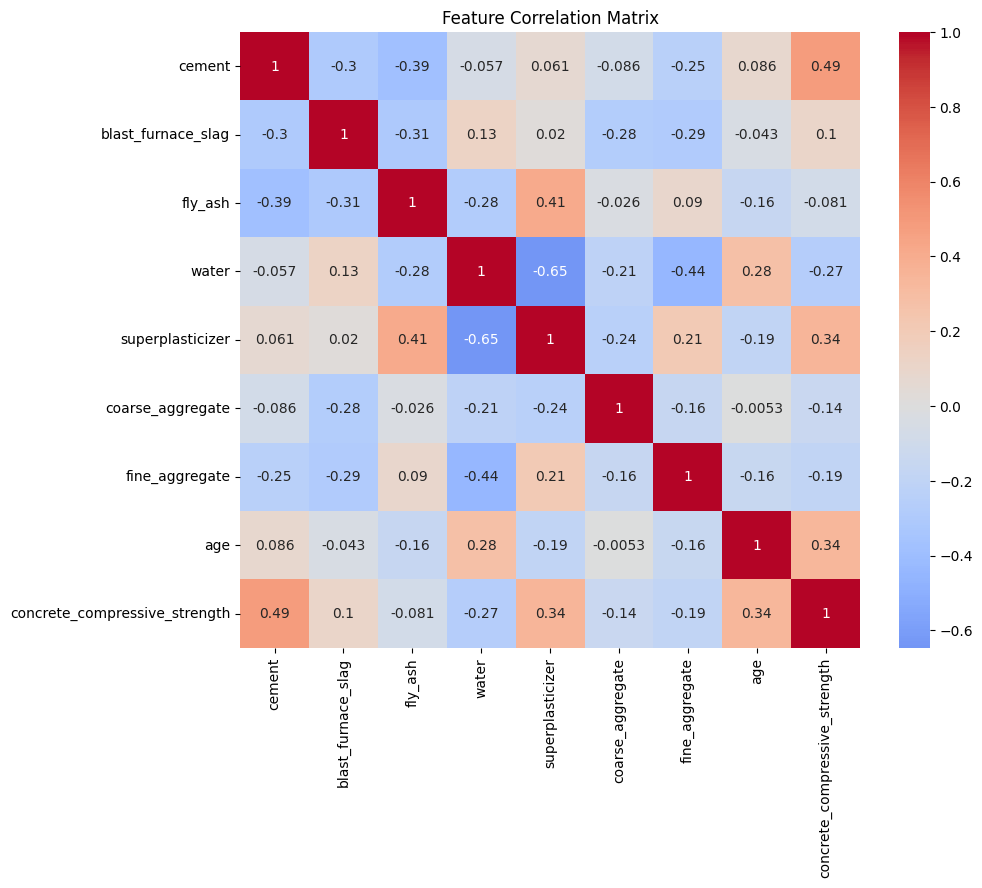

Correlation with compressive strength:
concrete_compressive_strength    1.000000
cement                           0.488283
superplasticizer                 0.344209
age                              0.337367
blast_furnace_slag               0.103374
fly_ash                         -0.080648
coarse_aggregate                -0.144717
fine_aggregate                  -0.186448
water                           -0.269624
Name: concrete_compressive_strength, dtype: float64


In [28]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

# Top correlations with target
target_corr = corr['concrete_compressive_strength'].sort_values(ascending=False)
print("Correlation with compressive strength:")
print(target_corr)

In [29]:
# Create water-to-cement ratio (important in concrete strength)
df['water_cement_ratio'] = df['water'] / df['cement']

# Create aggregate ratio
df['aggregate_ratio'] = df['coarse_aggregate'] / df['fine_aggregate']

# Create total binder content
df['total_binder'] = df['cement'] + df['blast_furnace_slag'] + df['fly_ash']

# Check new feature correlations
new_features = ['water_cement_ratio', 'aggregate_ratio', 'total_binder']
for feat in new_features:
    corr = df[feat].corr(df['concrete_compressive_strength'])
    print(f"{feat} correlation with strength: {corr:.3f}")

water_cement_ratio correlation with strength: -0.489
aggregate_ratio correlation with strength: 0.075
total_binder correlation with strength: 0.598


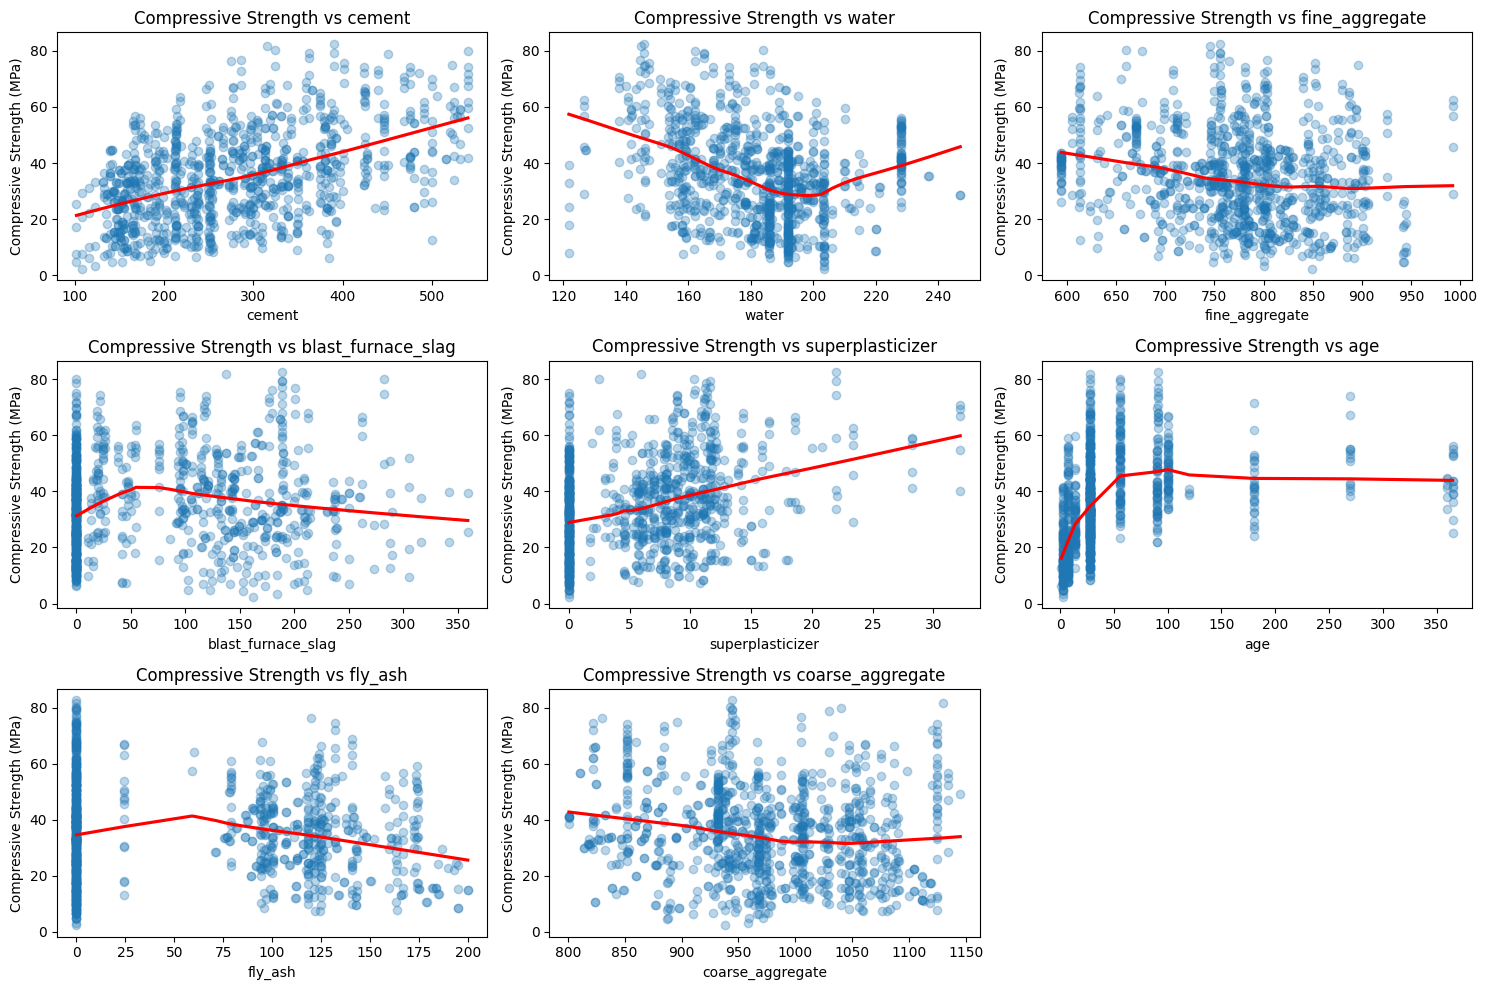

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Charger les données (remplacez par votre DataFrame)
# df = pd.read_csv("votre_fichier.csv")

# Variables à analyser
features = ['cement', 'water', 'fine_aggregate', 'blast_furnace_slag', 
            'superplasticizer', 'age', 'fly_ash', 'coarse_aggregate']

# Ajuster la taille des graphiques
plt.figure(figsize=(15, 10))

# Afficher les courbes de lissage pour chaque variable
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.regplot(
        x=df[feature], 
        y=df['concrete_compressive_strength'],
        lowess=True,  # Activation du lissage LOESS
        line_kws={'color': 'red'},  # Couleur de la courbe
        scatter_kws={'alpha': 0.3}  # Transparence des points
    )
    plt.title(f"Compressive Strength vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Compressive Strength (MPa)")

plt.tight_layout()
plt.show()

In [31]:
df.isna().sum()


cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
water_cement_ratio               0
aggregate_ratio                  0
total_binder                     0
dtype: int64

In [32]:
df.duplicated().sum()


0

In [33]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your dataset
df = pd.read_csv("concrete_data.csv")

# Separate features and target
X = df.drop("concrete_compressive_strength", axis=1)
y = df["concrete_compressive_strength"]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame (optional)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Verify standardization (mean ≈ 0, std ≈ 1)
print(X_scaled.describe().round(2))

        cement  blast_furnace_slag  fly_ash    water  superplasticizer  \
count  1030.00             1030.00  1030.00  1030.00           1030.00   
mean     -0.00               -0.00    -0.00    -0.00             -0.00   
std       1.00                1.00     1.00     1.00              1.00   
min      -1.72               -0.86    -0.85    -2.80             -1.04   
25%      -0.85               -0.86    -0.85    -0.78             -1.04   
50%      -0.08               -0.60    -0.85     0.16              0.03   
75%       0.66                0.80     1.00     0.49              0.67   
max       2.48                3.31     2.28     3.07              4.35   

       coarse_aggregate  fine_aggregate       age  
count           1030.00          1030.00  1030.00  
mean               0.00            -0.00     0.00  
std                1.00             1.00     1.00  
min               -2.21            -2.24    -0.71  
25%               -0.53            -0.53    -0.61  
50%               -0.

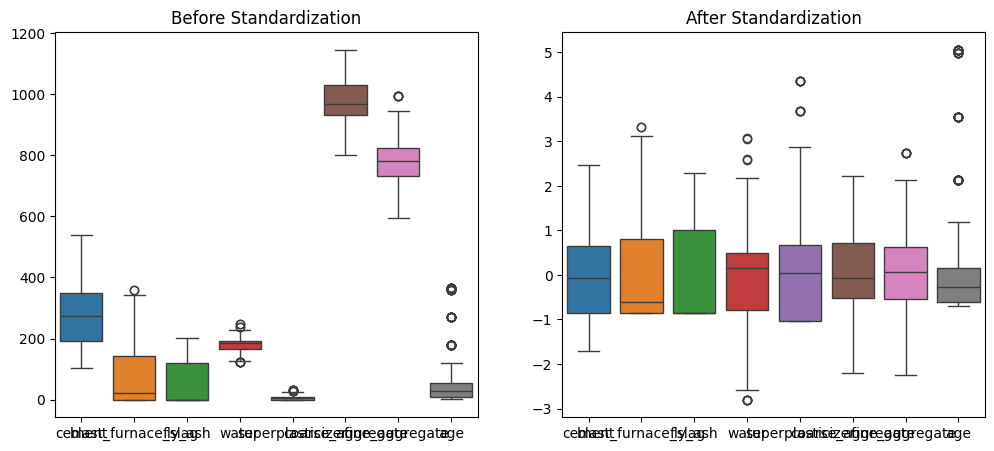

In [34]:
import matplotlib.pyplot as plt

# Before standardization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X)
plt.title("Before Standardization")

# After standardization
plt.subplot(1, 2, 2)
sns.boxplot(data=X_scaled)
plt.title("After Standardization")
plt.show()

In [35]:

from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("concrete_data.csv")
X = df.drop("concrete_compressive_strength", axis=1)
y = df["concrete_compressive_strength"]

# Bin the target into 3 classes (Low, Medium, High)
y_binned = pd.cut(y, bins=3, labels=["Low", "Medium", "High"])

# Check class distribution
print("Original Class Distribution:")
print(y_binned.value_counts())

Original Class Distribution:
concrete_compressive_strength
Medium    520
Low       378
High      132
Name: count, dtype: int64


In [36]:
from imblearn.over_sampling import SMOTE

# Split data (SMOTE should only be applied to training data)
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check new distribution
print("\nClass Distribution After SMOTE:")
print(y_train_smote.value_counts())


Class Distribution After SMOTE:
concrete_compressive_strength
Low       404
Medium    404
High      404
Name: count, dtype: int64


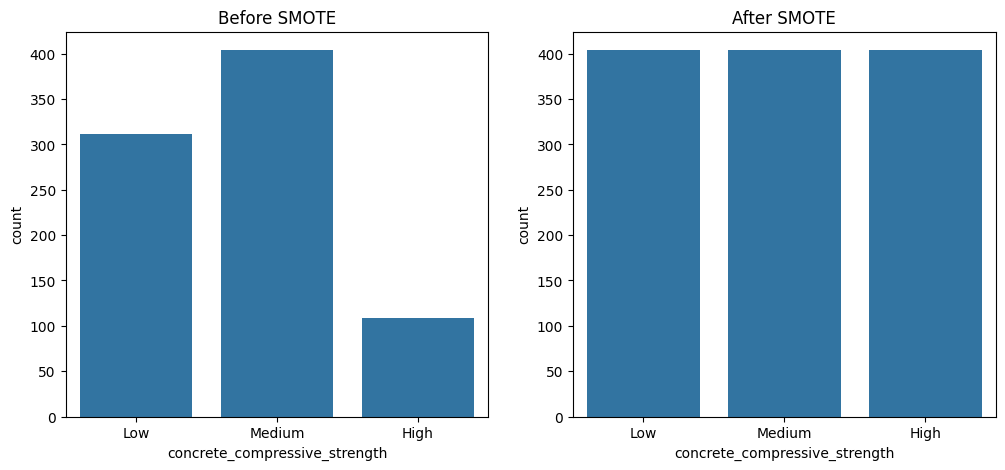

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Before SMOTE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Before SMOTE")

# After SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_smote)
plt.title("After SMOTE")
plt.show()

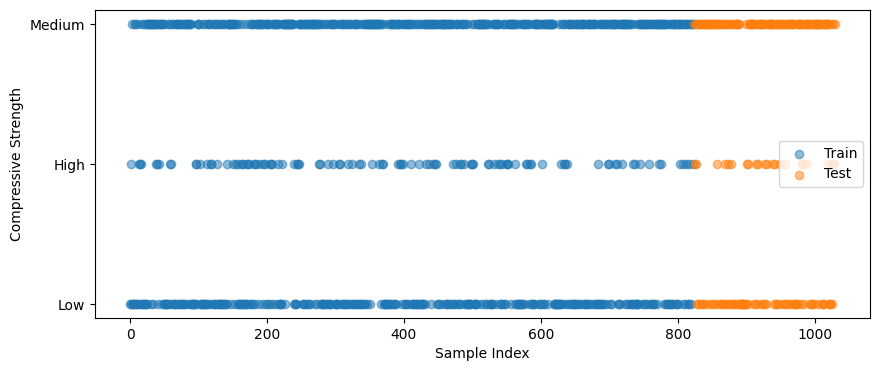

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.scatter(range(len(y_train)), y_train, alpha=0.5, label='Train')
plt.scatter(range(len(y_train), len(y_train)+len(y_test)), y_test, alpha=0.5, label='Test')
plt.xlabel("Sample Index")
plt.ylabel("Compressive Strength")
plt.legend()
plt.show()

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
import lightgbm as lgb

# Load data
df = pd.read_csv("concrete_data.csv")
X = df.drop("concrete_compressive_strength", axis=1)
y = df["concrete_compressive_strength"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
import lightgbm as lgb

# XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.2,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Results:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, xgb_pred)):.2f}")
print(f"R²: {r2_score(y_test, xgb_pred):.2f}")

XGBoost Results:
RMSE: 4.30
R²: 0.93


In [42]:
from sklearn.tree import DecisionTreeRegressor

# AdaBoost with Decision Tree base estimator
ada_model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=4),
    n_estimators=150,
    learning_rate=0.1,
    random_state=42
)

ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)

# Evaluation
print("\nAdaBoost Results:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, ada_pred)):.2f}")
print(f"R²: {r2_score(y_test, ada_pred):.2f}")


AdaBoost Results:
RMSE: 7.40
R²: 0.79


In [43]:
# LightGBM model
lgb_model = lgb.LGBMRegressor(
    num_leaves=31,
    max_depth=5,
    learning_rate=0.05,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

# Evaluation
print("\nLightGBM Results:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, lgb_pred)):.2f}")
print(f"R²: {r2_score(y_test, lgb_pred):.2f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 973
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 8
[LightGBM] [Info] Start training from score 35.857864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [45]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Grid search
grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best XGBoost Parameters:", grid_search.best_params_)
best_xgb = grid_search.best_estimator_

Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}


In [58]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import (RandomForestRegressor, ExtraTreesRegressor, 
                             AdaBoostRegressor, GradientBoostingRegressor, 
                             BaggingRegressor)

# Initialize models
models = {
    "Linear": LinearRegression(),
    "KNeighbors": KNeighborsRegressor(n_neighbors=5),
    "DecisionTree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "SVR": SVR(kernel='rbf', C=10),
    "LASSO": Lasso(alpha=0.1),
    "ExtraTrees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Bagging": BaggingRegressor(n_estimators=100, random_state=42),
}

In [59]:
# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [60]:
results = []

for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_scaled)
    
    # Metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results.append({
        "Regressor": name,
        "R²": round(r2, 2),
        "MSE": round(mse, 2),
        "RMSE": round(rmse, 2)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values("R²", ascending=False)

In [61]:
print(results_df.to_markdown(index=False, floatfmt=".2f"))

| Regressor        |   R² |   MSE |   RMSE |
|:-----------------|-----:|------:|-------:|
| ExtraTrees       | 0.89 | 27.60 |   5.25 |
| RandomForest     | 0.88 | 29.85 |   5.46 |
| GradientBoosting | 0.88 | 30.18 |   5.49 |
| Bagging          | 0.88 | 30.40 |   5.51 |
| SVR              | 0.80 | 51.06 |   7.15 |
| AdaBoost         | 0.77 | 58.55 |   7.65 |
| KNeighbors       | 0.71 | 73.62 |   8.58 |
| DecisionTree     | 0.64 | 93.08 |   9.65 |
| Linear           | 0.63 | 95.97 |   9.80 |
| LASSO            | 0.63 | 96.41 |   9.82 |


In [62]:
!pip install optuna
import optuna
from sklearn.model_selection import cross_val_score

  Using cached optuna-4.2.1-py3-none-any.whl.metadata (17 kB)
  Using cached colorlog-6.9.0-py3-none-any.whl.metadata (10 kB)
Using cached optuna-4.2.1-py3-none-any.whl (383 kB)
Using cached colorlog-6.9.0-py3-none-any.whl (11 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [72]:
# Base estimator for AdaBoost
from sklearn.tree import DecisionTreeRegressor

ada_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'estimator__max_depth': [1, 2, 3]  # Controls base tree complexity
}

ada_base = DecisionTreeRegressor(random_state=42)
ada_grid = GridSearchCV(
    AdaBoostRegressor(estimator=ada_base, random_state=42),
    param_grid=ada_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

ada_grid.fit(X_train, y_train)

# Best AdaBoost model
best_ada = ada_grid.best_estimator_
ada_pred = best_ada.predict(X_test)

In [73]:
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'subsample': [0.8, 1.0]
}

gb_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid=gb_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

gb_grid.fit(X_train, y_train)

# Best Gradient Boosting model
best_gb = gb_grid.best_estimator_
gb_pred = best_gb.predict(X_test)

In [74]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 0.8],
    'bootstrap': [True, False]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=rf_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

# Best Random Forest model
best_rf = rf_grid.best_estimator_
rf_pred = best_rf.predict(X_test)

In [75]:
def evaluate_model(name, model, X_test, y_test):
    pred = model.predict(X_test)
    return {
        "Model": name,
        "R²": round(r2_score(y_test, pred), 2),
        "RMSE": round(np.sqrt(mean_squared_error(y_test, pred)), 2),
        "Best Params": model.best_params_
    }

results = [
    evaluate_model("AdaBoost", ada_grid, X_test, y_test),
    evaluate_model("Gradient Boosting", gb_grid, X_test, y_test),
    evaluate_model("Random Forest", rf_grid, X_test, y_test)
]

results_df = pd.DataFrame(results)
print(results_df.to_markdown(index=False))

| Model             |   R² |   RMSE | Best Params                                                                                              |
|:------------------|-----:|-------:|:---------------------------------------------------------------------------------------------------------|
| AdaBoost          | 0.77 |   7.76 | {'estimator__max_depth': 3, 'learning_rate': 0.5, 'n_estimators': 150}                                   |
| Gradient Boosting | 0.93 |   4.35 | {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 1.0}    |
| Random Forest     | 0.89 |   5.35 | {'bootstrap': True, 'max_depth': None, 'max_features': 0.8, 'min_samples_split': 2, 'n_estimators': 200} |


In [77]:
def ada_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5, log=True),
        'estimator__max_depth': trial.suggest_int('estimator__max_depth', 1, 5)
    }
    
    model = AdaBoostRegressor(
        estimator=DecisionTreeRegressor(random_state=42),
        **params,
        random_state=42
    )
    
    return np.mean(cross_val_score(
        model, X_train, y_train, 
        cv=5, scoring='neg_mean_squared_error'
    ))

In [78]:
def gb_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0)
    }
    
    model = GradientBoostingRegressor(**params, random_state=42)
    return np.mean(cross_val_score(
        model, X_train, y_train, 
        cv=5, scoring='neg_mean_squared_error'
    ))

In [79]:
def rf_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'max_features': trial.suggest_float('max_features', 0.1, 1.0),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }
    
    model = RandomForestRegressor(**params, random_state=42)
    return np.mean(cross_val_score(
        model, X_train, y_train, 
        cv=5, scoring='neg_mean_squared_error'
    ))

In [80]:
def rf_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'max_features': trial.suggest_float('max_features', 0.1, 1.0),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }
    
    model = RandomForestRegressor(**params, random_state=42)
    return np.mean(cross_val_score(
        model, X_train, y_train, 
        cv=5, scoring='neg_mean_squared_error'
    ))

In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import (
    AdaBoostRegressor, 
    GradientBoostingRegressor, 
    RandomForestRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import optuna
from optuna.samplers import TPESampler

# 1. Load and prepare data
df = pd.read_csv("concrete_data.csv")
X = df.drop("concrete_compressive_strength", axis=1)
y = df["concrete_compressive_strength"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define objective functions with proper parameter passing
def ada_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5, log=True),
    }
    base_estimator = DecisionTreeRegressor(
        max_depth=trial.suggest_int('max_depth', 1, 5),
        random_state=42
    )
    model = AdaBoostRegressor(
        estimator=base_estimator,
        **params,
        random_state=42
    )
    return np.mean(cross_val_score(
        model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'
    ))

def gb_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0)
    }
    model = GradientBoostingRegressor(**params, random_state=42)
    return np.mean(cross_val_score(
        model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'
    ))

def rf_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'max_features': trial.suggest_float('max_features', 0.1, 1.0),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }
    model = RandomForestRegressor(**params, random_state=42)
    return np.mean(cross_val_score(
        model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'
    ))

# 3. Run studies
def run_study(objective, n_trials=50):
    study = optuna.create_study(
        direction='maximize',
        sampler=TPESampler(seed=42)
    )
    study.optimize(objective, n_trials=n_trials)
    return study

print("Optimizing AdaBoost...")
ada_study = run_study(ada_objective)

print("Optimizing Gradient Boosting...")
gb_study = run_study(gb_objective)

print("Optimizing Random Forest...")
rf_study = run_study(rf_objective)

# 4. Get best models
def get_best_model(study, model_class):
    best_params = study.best_params
    if model_class == AdaBoostRegressor:
        base_estimator = DecisionTreeRegressor(
            max_depth=best_params.pop('max_depth'),
            random_state=42
        )
        return model_class(
            estimator=base_estimator,
            **best_params,
            random_state=42
        )
    return model_class(**best_params, random_state=42)

best_ada = get_best_model(ada_study, AdaBoostRegressor)
best_gb = get_best_model(gb_study, GradientBoostingRegressor)
best_rf = get_best_model(rf_study, RandomForestRegressor)

# 5. Train and evaluate
models = {
    "AdaBoost": best_ada,
    "Gradient Boosting": best_gb,
    "Random Forest": best_rf
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results.append({
        "Model": name,
        "R²": round(r2_score(y_test, pred), 3),
        "RMSE": round(np.sqrt(mean_squared_error(y_test, pred)), 2)
    })

results_df = pd.DataFrame(results).sort_values("R²", ascending=False)
print("\nFinal Results:")
print(results_df.to_markdown(index=False))

[I 2025-04-01 00:22:47,514] A new study created in memory with name: no-name-97c76700-ec49-459b-b01f-20691647fea3


Optimizing AdaBoost...


[I 2025-04-01 00:22:48,462] Trial 0 finished with value: -45.2623578984539 and parameters: {'n_estimators': 106, 'learning_rate': 0.4123206532618726, 'max_depth': 4}. Best is trial 0 with value: -45.2623578984539.
[I 2025-04-01 00:22:49,354] Trial 1 finished with value: -162.6782376152979 and parameters: {'n_estimators': 140, 'learning_rate': 0.018410729205738687, 'max_depth': 1}. Best is trial 0 with value: -45.2623578984539.
[I 2025-04-01 00:22:49,863] Trial 2 finished with value: -49.19352644727024 and parameters: {'n_estimators': 58, 'learning_rate': 0.29621516588303487, 'max_depth': 4}. Best is trial 0 with value: -45.2623578984539.
[I 2025-04-01 00:22:51,447] Trial 3 finished with value: -44.6991728414104 and parameters: {'n_estimators': 156, 'learning_rate': 0.01083858126934475, 'max_depth': 5}. Best is trial 3 with value: -44.6991728414104.
[I 2025-04-01 00:22:52,438] Trial 4 finished with value: -160.40840293131873 and parameters: {'n_estimators': 175, 'learning_rate': 0.02294

Optimizing Gradient Boosting...


[I 2025-04-01 00:23:55,188] Trial 0 finished with value: -21.74739629366439 and parameters: {'n_estimators': 175, 'learning_rate': 0.17254716573280354, 'max_depth': 6, 'min_samples_split': 7, 'subsample': 0.6624074561769746}. Best is trial 0 with value: -21.74739629366439.
[I 2025-04-01 00:23:56,462] Trial 1 finished with value: -42.048026931972906 and parameters: {'n_estimators': 131, 'learning_rate': 0.011900590783184251, 'max_depth': 7, 'min_samples_split': 7, 'subsample': 0.8832290311184181}. Best is trial 0 with value: -21.74739629366439.
[I 2025-04-01 00:23:57,287] Trial 2 finished with value: -24.826105681652393 and parameters: {'n_estimators': 104, 'learning_rate': 0.18276027831785724, 'max_depth': 7, 'min_samples_split': 3, 'subsample': 0.6727299868828402}. Best is trial 0 with value: -21.74739629366439.
[I 2025-04-01 00:23:58,219] Trial 3 finished with value: -27.406358509805052 and parameters: {'n_estimators': 136, 'learning_rate': 0.024878734419814436, 'max_depth': 5, 'min_

Optimizing Random Forest...


[I 2025-04-01 00:25:43,417] Trial 0 finished with value: -29.261464632522213 and parameters: {'n_estimators': 175, 'max_depth': 29, 'min_samples_split': 8, 'max_features': 0.6387926357773329, 'bootstrap': True}. Best is trial 0 with value: -29.261464632522213.
[I 2025-04-01 00:25:44,491] Trial 1 finished with value: -26.612494679685323 and parameters: {'n_estimators': 111, 'max_depth': 27, 'min_samples_split': 7, 'max_features': 0.737265320016441, 'bootstrap': False}. Best is trial 1 with value: -26.612494679685323.
[I 2025-04-01 00:25:46,077] Trial 2 finished with value: -30.79507158432791 and parameters: {'n_estimators': 267, 'max_depth': 10, 'min_samples_split': 3, 'max_features': 0.2650640588680905, 'bootstrap': False}. Best is trial 1 with value: -26.612494679685323.
[I 2025-04-01 00:25:46,808] Trial 3 finished with value: -50.194592355442914 and parameters: {'n_estimators': 186, 'max_depth': 12, 'min_samples_split': 7, 'max_features': 0.22554447458683766, 'bootstrap': False}. Bes


Final Results:
| Model             |    R² |   RMSE |
|:------------------|------:|-------:|
| Gradient Boosting | 0.921 |   4.52 |
| Random Forest     | 0.887 |   5.4  |
| AdaBoost          | 0.834 |   6.54 |
